# Goodwin's oscillator toy model

This example shows how the Goodwin's Oscillator toy model can be used.

This model has five parameters, and three oscillating states. In this example we only 'observe' one of these states, making the problem very hard to solve.

In [1]:
import pints
import pints.toy
import pints.plot
import matplotlib.pyplot as plt
import numpy as np

model = pints.toy.GoodwinOscillatorModel()

We can get an example set of parameters using the `suggested_parameters()` method:

In [2]:
real_parameters = model.suggested_parameters()

In the same way, we can get a suggested set of sampling times:

In [3]:
times = model.suggested_times()

Now we can run a simulation:

In [4]:
values = model.simulate(real_parameters, times)

This gives us all we need to create a plot of current versus time:

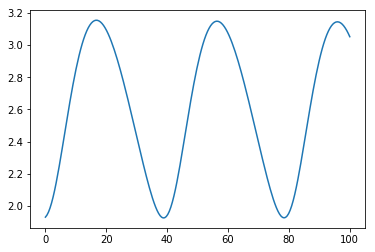

In [5]:
plt.figure()
plt.plot(times, values)
plt.show()

Now we will add some noise to generate some fake "experimental" data and try to recover the original parameters.

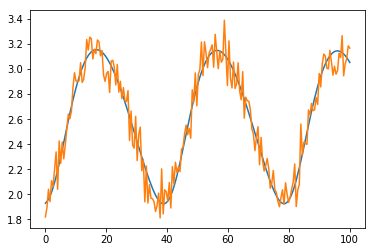

In [6]:
noise = 0.1
noisy_values = values + np.random.normal(0, noise, values.shape)

plt.figure()
plt.plot(times, values)
plt.plot(times, noisy_values)
plt.show()

Now we can try and infer the original parameters:

In [7]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a log posterior
log_prior = pints.UniformLogPrior([0.01]*5, [3]*5)
log_likelihood = pints.KnownNoiseLogLikelihood(problem, noise)
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Run MCMC on the noisy data
x0 = [[0.1]*5]*3
mcmc = pints.MCMCSampling(log_posterior, 3, x0)
mcmc.set_max_iterations(5000)
mcmc.set_log_to_screen(False)

print('Running')
chains = mcmc.run()
print('Done!')

Running
Done!


Now we can expect the resulting chains:

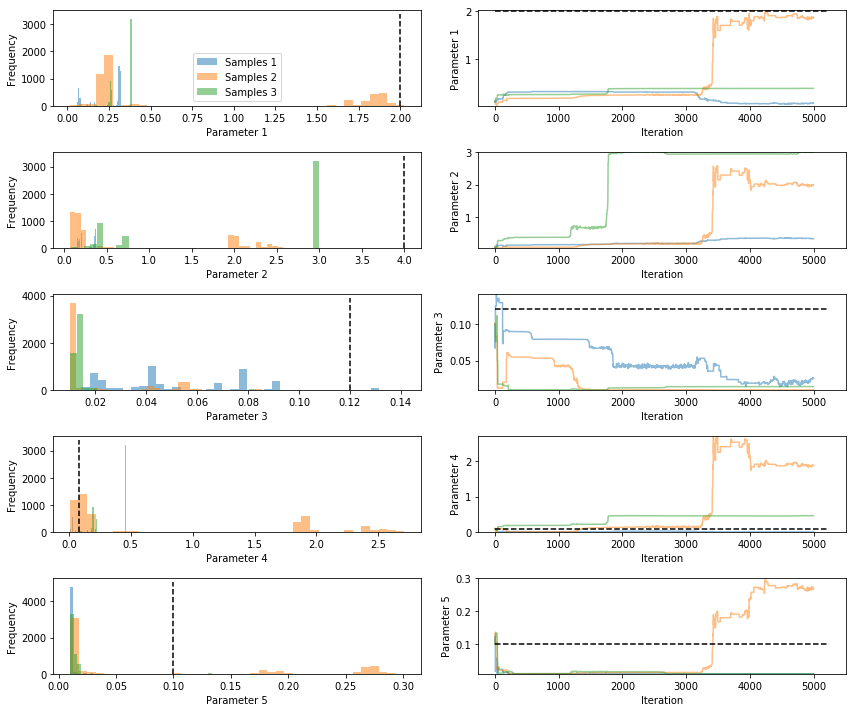

In [8]:
pints.plot.trace(chains, ref_parameters=real_parameters)
plt.show()

This is a pretty hard problem for MCMC!

And what about optimisation?

In [9]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a log posterior
log_prior = pints.UniformLogPrior([0.01]*5, [3]*5)
log_likelihood = pints.KnownNoiseLogLikelihood(problem, noise)
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Fit to the noisy data
parameters = []
for x in x0:
    xbest, fbest = pints.optimise(log_posterior, x, method=pints.CMAES)
    parameters.append(xbest)

print('')
print('            p1       p2       p3       p4       p5')
print('real  ' + ' '.join(['{: 8.4g}'.format(float(x)) for x in real_parameters]))
for i, p in enumerate(parameters):
    print('run ' + str(i) + ' ' + ' '.join(['{: 8.4g}'.format(x) for x in p]))
    

Maximising LogPDF
using Covariance Matrix Adaptation Evolution Strategy (CMA-ES)
Running in sequential mode.
Population size: 8
Iter. Eval. Best      Time m:s
0     8     -13200.05   0:00.2
1     16    -12627.24   0:00.2
2     24    -12174.45   0:00.3
3     32    -12174.45   0:00.3
20    168   -5995.788   0:00.8
40    328   -3615.176   0:01.1
60    488   -2977.366   0:01.4
80    648   -2711.114   0:01.7
100   808   -2120.424   0:02.0
120   968   -2084.558   0:02.3
140   1128  -2040.561   0:02.8
160   1288  -2023.414   0:03.3
180   1448  -2017.744   0:03.9
200   1608  -2017.466   0:04.4
220   1768  -2017.366   0:05.0
240   1928  -2017.337   0:05.6
260   2088  -2017.332   0:06.1
WARNING (module=cma.utilities.utils, iteration=266):  flat fitness (sigma=1.59e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.


/home/chonlei/anaconda3/envs/py2env/lib/python2.7/site-packages/cma-2.3.1-py2.7.egg/cma/evolution_strategy.py:3195: RuntimeWarning: invalid value encountered in double_scalars
  es.fit.fit[-1] - es.fit.fit[0] < opts['tolfun'] and


280   2248  -2017.331   0:06.4
300   2408  -2017.326   0:07.0
320   2568  -2017.205   0:07.7
340   2728  -2017.115   0:08.7
360   2888  -2017.107   0:09.5
380   3048  -2017.101   0:10.2
400   3208  -2017.101   0:10.9
420   3368  -2017.1     0:11.7
440   3528  -2017.1     0:12.5
460   3688  -2017.1     0:13.5
480   3848  -2017.1     0:14.5
500   4008  -2017.1     0:15.5
520   4168  -2017.1     0:16.4
540   4328  -2017.1     0:17.4
560   4488  -2017.1     0:18.4
580   4648  -2017.1     0:19.3
600   4808  -2017.1     0:20.2
620   4968  -2017.1     0:21.2
640   5128  -2017.1     0:22.2
660   5288  -2017.1     0:23.2
680   5448  -2017.1     0:24.2
700   5608  -2017.1     0:25.1
720   5768  -2017.1     0:26.1
740   5928  -2017.1     0:27.2
760   6088  -2017.1     0:28.4
780   6248  -2017.1     0:29.6
800   6408  -2017.1     0:30.7
820   6568  -2017.1     0:31.8
840   6728  -2017.1     0:32.9
860   6888  -2017.1     0:34.0
880   7048  -2017.1     0:35.2
900   7208  -2017.1     0:36.2
920   73